<a href="https://colab.research.google.com/github/ysuter/FHNW-BAI-DeepLearning/blob/main/Beispiele/mnist_mlp_with_validation_draw_confmat_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beispiel Klassifikation handgeschriebener Ziffern des MNIST-Datensatzes — **MLP (Fully Connected)**

Notebook fürs Training eines **fully connected networks (1 verborgene Scnhicht)** auf MNIST-Daten mit Bildern als 1D-Vektoren (28×28 → 784).  

> Angepasst vom offiziellen [PyTorch MNIST Beispiel](https://github.com/pytorch/examples/blob/main/mnist/main.py).


In [1]:
#@title Install dependencies (Colab usually has these pre-installed)
!pip -q install torch torchvision matplotlib tqdm pillow --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 94.8 MB/s eta 0:00:00


## Modell definieren

In [5]:
import random
import numpy as np
from dataclasses import dataclass
import torch
import torch.nn as nn
import torch.nn.functional as F


SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)

@dataclass
class Config:
    batch_size: int = 64
    test_batch_size: int = 1000
    epochs: int = 5
    lr: float = 1e-3
    gamma: float = 0.7
    log_interval: int = 100
    val_size: int = 10000
    use_amp: bool = True
    num_workers: int = 2
    hidden: int = 256
    p_drop: float = 0.2

cfg = Config()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


class FCNet(nn.Module):
    def __init__(self, hidden=256, p_drop=0.2):
        super().__init__()
        self.fc1 = nn.Linear(28*28, hidden)
        self.drop = nn.Dropout(p_drop)
        self.fc2 = nn.Linear(hidden, 10)
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = FCNet(hidden=cfg.hidden, p_drop=cfg.p_drop).to(device)
n_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(model)
print(f"Trainable parameters: {n_params:,}")

Device: cuda
FCNet(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)
Trainable parameters: 203,530


Device: cuda


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 502kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.62MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.7MB/s]

Train: 50000 | Val: 10000 | Test: 10000



/tmp/ipython-input-3741534092.py:62: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=cfg.use_amp and device.type == "cuda")


Train Epoch 1:   0%|          | 0/782 [00:00<?, ?it/s]

/tmp/ipython-input-3741534092.py:75: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler.is_enabled()):


Train avg loss: 0.2702
Val: avg loss 0.1504, acc 95.53% (9553/10000)
✅ Saved new best MLP (val acc=95.53%)


Train Epoch 2:   0%|          | 0/782 [00:00<?, ?it/s]

Train avg loss: 0.1247
Val: avg loss 0.1113, acc 96.82% (9682/10000)
✅ Saved new best MLP (val acc=96.82%)


Train Epoch 3:   0%|          | 0/782 [00:00<?, ?it/s]

Train avg loss: 0.0838
Val: avg loss 0.0915, acc 97.37% (9737/10000)
✅ Saved new best MLP (val acc=97.37%)


Train Epoch 4:   0%|          | 0/782 [00:00<?, ?it/s]

Train avg loss: 0.0675
Val: avg loss 0.0868, acc 97.41% (9741/10000)
✅ Saved new best MLP (val acc=97.41%)


Train Epoch 5:   0%|          | 0/782 [00:00<?, ?it/s]

Train avg loss: 0.0491
Val: avg loss 0.0795, acc 97.49% (9749/10000)
✅ Saved new best MLP (val acc=97.49%)


Train Epoch 6:   0%|          | 0/782 [00:00<?, ?it/s]

Train avg loss: 0.0429
Val: avg loss 0.0791, acc 97.75% (9775/10000)
✅ Saved new best MLP (val acc=97.75%)


Train Epoch 7:   0%|          | 0/782 [00:00<?, ?it/s]

Train avg loss: 0.0339
Val: avg loss 0.0764, acc 97.78% (9778/10000)
✅ Saved new best MLP (val acc=97.78%)


Train Epoch 8:   0%|          | 0/782 [00:00<?, ?it/s]

Train avg loss: 0.0292
Val: avg loss 0.0723, acc 97.79% (9779/10000)
✅ Saved new best MLP (val acc=97.79%)


Train Epoch 9:   0%|          | 0/782 [00:00<?, ?it/s]

Train avg loss: 0.0238
Val: avg loss 0.0701, acc 97.79% (9779/10000)


Train Epoch 10:   0%|          | 0/782 [00:00<?, ?it/s]

Train avg loss: 0.0218
Val: avg loss 0.0704, acc 97.93% (9793/10000)
✅ Saved new best MLP (val acc=97.93%)
Best validation accuracy: 97.93%


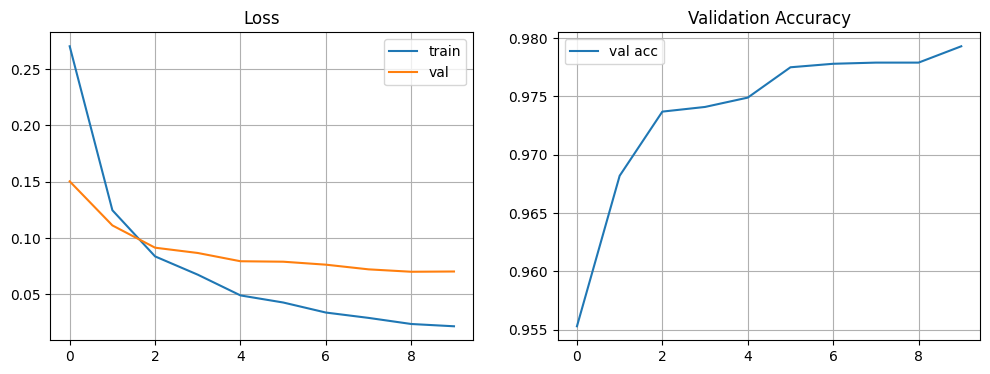

Test: avg loss 0.0572, acc 98.32% (9832/10000)


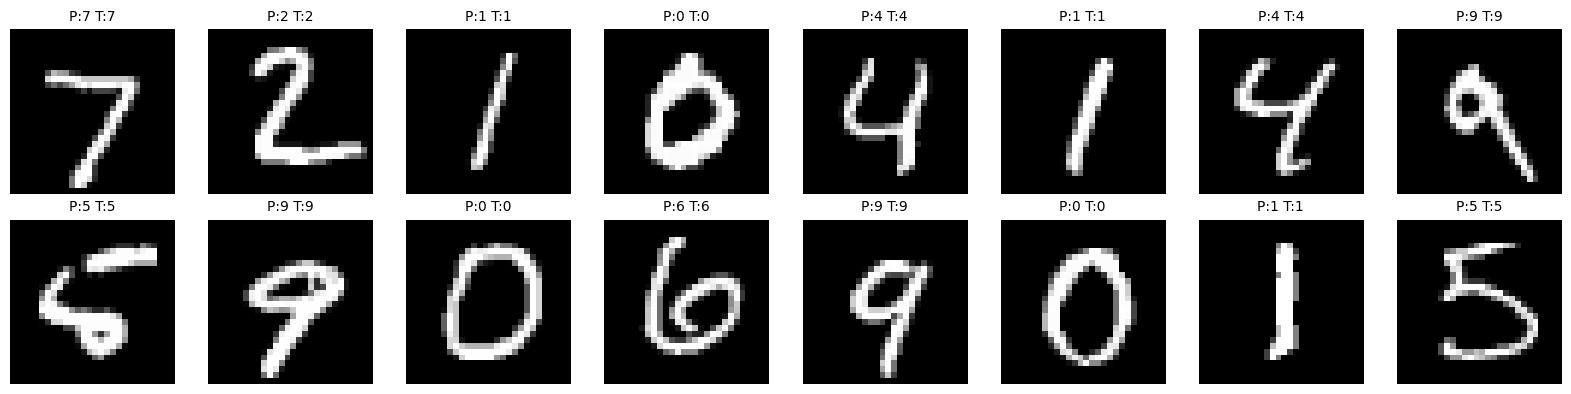

In [6]:
#@title MNIST: Daten und Modell, Training mit Validation, Test, und Visualisierung
import os, math, random, io
from dataclasses import dataclass
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)

@dataclass
class Config:
    batch_size: int = 64
    test_batch_size: int = 1000
    epochs: int = 10
    lr: float = 1e-3
    gamma: float = 0.7
    log_interval: int = 100
    val_size: int = 10000
    use_amp: bool = True
    num_workers: int = 2
    hidden: int = 256
    p_drop: float = 0.2

cfg = Config()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

root = "./data"
full_train = datasets.MNIST(root, train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root, train=False, download=True, transform=transform)

val_size = cfg.val_size
train_size = len(full_train) - val_size
generator = torch.Generator().manual_seed(SEED)
train_ds, val_ds = random_split(full_train, [train_size, val_size], generator=generator)

loader_train_kwargs = dict(batch_size=cfg.batch_size, shuffle=True)
loader_eval_kwargs  = dict(batch_size=cfg.test_batch_size, shuffle=False)
if device.type == "cuda":
    loader_train_kwargs.update(num_workers=cfg.num_workers, pin_memory=True)
    loader_eval_kwargs.update(num_workers=cfg.num_workers, pin_memory=True)

train_loader = DataLoader(train_ds, **loader_train_kwargs)
val_loader   = DataLoader(val_ds, **loader_eval_kwargs)
test_loader  = DataLoader(mnist_test, **loader_eval_kwargs)

print(f"Train: {len(train_ds)} | Val: {len(val_ds)} | Test: {len(mnist_test)}")

optimizer = torch.optim.Adam(model.parameters(), lr=cfg.lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=cfg.gamma)
scaler = torch.cuda.amp.GradScaler(enabled=cfg.use_amp and device.type == "cuda")
criterion = nn.NLLLoss()

train_history = {"loss": []}
val_history = {"loss": [], "acc": []}

def train_epoch(epoch):
    model.train()
    running = 0.0
    pbar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Train Epoch {epoch}")
    for batch_idx, (data, target) in pbar:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad(set_to_none=True)
        with torch.cuda.amp.autocast(enabled=scaler.is_enabled()):
            output = model(data)
            loss = criterion(output, target)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        running += loss.item() * data.size(0)
        if batch_idx % cfg.log_interval == 0:
            pbar.set_postfix(loss=f"{loss.item():.4f}")
    avg = running / len(train_loader.dataset)
    train_history["loss"].append(avg)
    print(f"Train avg loss: {avg:.4f}")
    return avg

@torch.no_grad()
def evaluate(loader, split_name="Val"):
    model.eval()
    total_loss, correct = 0.0, 0
    for data, target in loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        loss = criterion(output, target)
        total_loss += loss.item() * data.size(0)
        pred = output.argmax(dim=1)
        correct += pred.eq(target).sum().item()
    avg_loss = total_loss / len(loader.dataset)
    acc = correct / len(loader.dataset)
    print(f"{split_name}: avg loss {avg_loss:.4f}, acc {acc*100:.2f}% ({correct}/{len(loader.dataset)})")
    if split_name.lower().startswith("val"):
        val_history["loss"].append(avg_loss)
        val_history["acc"].append(acc)
    return avg_loss, acc

BEST_PATH = "best_mnist_val_fc.pt"
best_val_acc = -1.0
for epoch in range(1, cfg.epochs + 1):
    _ = train_epoch(epoch)
    _, val_acc = evaluate(val_loader, "Val")
    scheduler.step()
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), BEST_PATH)
        print(f"✅ Saved new best MLP (val acc={best_val_acc*100:.2f}%)")
print(f"Best validation accuracy: {best_val_acc*100:.2f}%")

plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.plot(train_history["loss"], label="train"); plt.plot(val_history["loss"], label="val"); plt.title("Loss"); plt.grid(True); plt.legend()
plt.subplot(1,2,2); plt.plot(val_history["acc"], label="val acc"); plt.title("Validation Accuracy"); plt.grid(True); plt.legend()
plt.show()

model.load_state_dict(torch.load(BEST_PATH, map_location=device))
_ = evaluate(test_loader, "Test")

@torch.no_grad()
def show_batch_predictions(loader, n_images=16):
    model.eval()
    data, target = next(iter(loader))
    data, target = data.to(device), target.to(device)
    output = model(data)
    preds = output.argmax(dim=1)
    imgs = data.cpu()
    cols = 8
    rows = math.ceil(n_images / cols)
    plt.figure(figsize=(cols*2, rows*2))
    for i in range(n_images):
        if i >= imgs.size(0): break
        img = imgs[i,0]
        img = img * 0.3081 + 0.1307  # denormalize
        plt.subplot(rows, cols, i+1)
        plt.imshow(img.numpy(), cmap="gray")
        plt.title(f"P:{preds[i].item()} T:{target[i].item()}", fontsize=10)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_batch_predictions(test_loader, n_images=16)


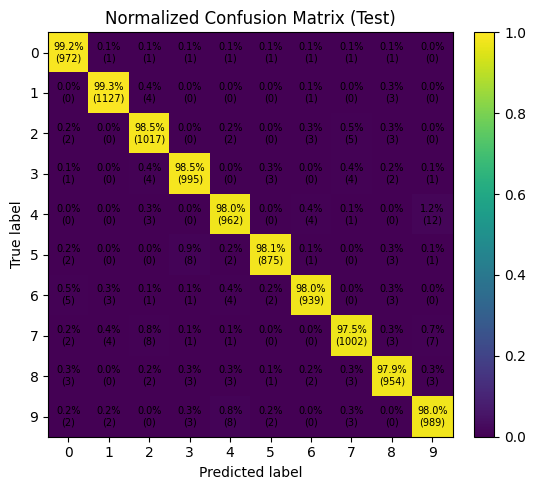

Per-class accuracy: [0.9918 0.993  0.9855 0.9851 0.9796 0.9809 0.9802 0.9747 0.9795 0.9802]
Overall accuracy: 0.9832


In [7]:
#@title Confusion Matrix on the Test Set (Normalized)
import numpy as np
import matplotlib.pyplot as plt
import torch

@torch.no_grad()
def compute_confusion_matrix(model, loader, device, num_classes=10, normalize=True, eps=1e-12):
    model.eval()
    cm = np.zeros((num_classes, num_classes), dtype=np.int64)
    for data, target in loader:
        data, target = data.to(device), target.to(device)
        pred = model(data).argmax(dim=1)
        for t, p in zip(target.view(-1), pred.view(-1)):
            cm[int(t.item()), int(p.item())] += 1
    if normalize:
        row_sums = cm.sum(axis=1, keepdims=True)
        cm_norm = cm / np.maximum(row_sums, eps)
        return cm, cm_norm
    else:
        return cm, None

model.load_state_dict(torch.load("best_mnist_val_fc.pt", map_location=device))
cm_raw, cm_norm = compute_confusion_matrix(model, test_loader, device, num_classes=10, normalize=True)

fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(cm_norm, vmin=0.0, vmax=1.0, interpolation='nearest')
ax.set_title('Normalized Confusion Matrix (Test)')
ax.set_xlabel('Predicted label'); ax.set_ylabel('True label')
ax.set_xticks(range(10)); ax.set_yticks(range(10))
ax.set_xticklabels(range(10)); ax.set_yticklabels(range(10))
for i in range(10):
    for j in range(10):
        ax.text(j, i, f"{cm_norm[i, j]*100:.1f}%\n({cm_raw[i, j]})",
                ha='center', va='center', fontsize=7)
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

per_class_acc = np.diag(cm_norm)
overall_acc = np.trace(cm_raw) / cm_raw.sum()
print("Per-class accuracy:", np.round(per_class_acc, 4))
print("Overall accuracy:", round(overall_acc, 4))


Collected 168 misclassified samples.


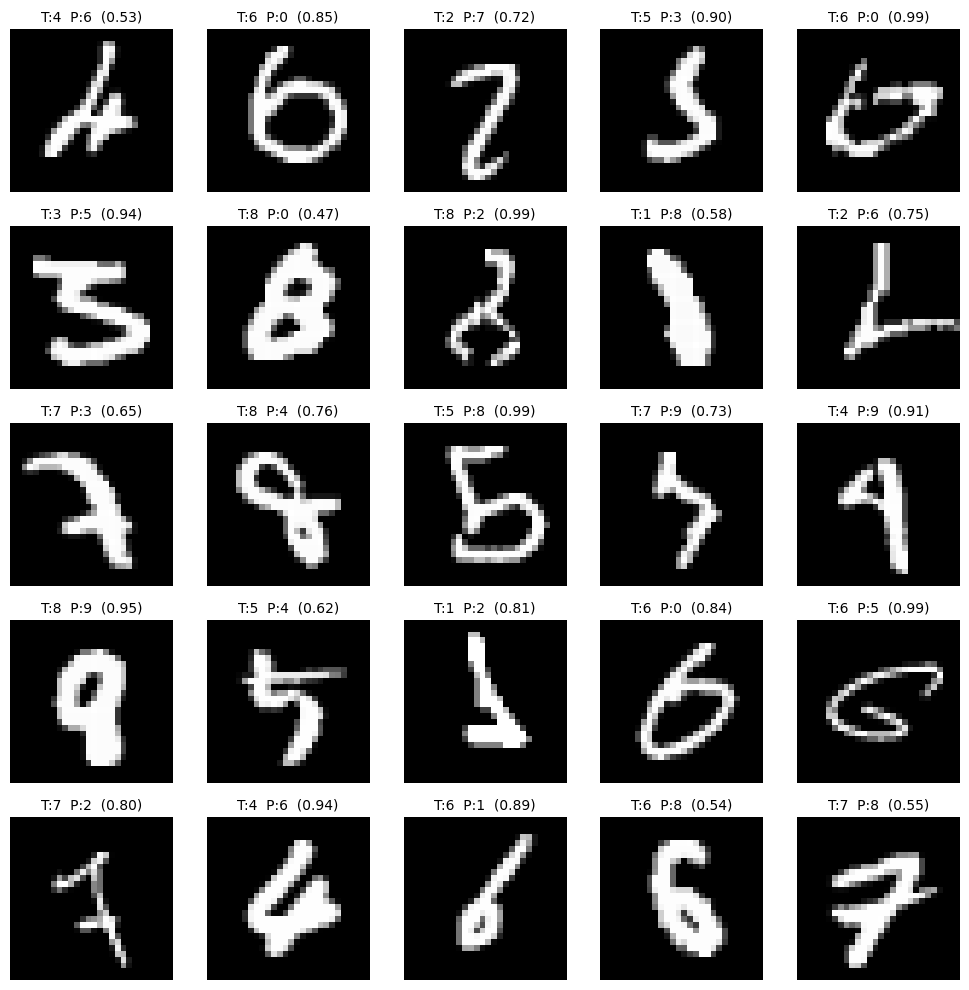

In [8]:
#@title Collect and visualize misclassified test samples
import math
import torch
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

@torch.no_grad()
def collect_misclassified(model, loader, device):
    model.eval()
    mis = []
    for x, y in loader:
        x = x.to(device)
        y = y.to(device)
        logits = model(x)
        probs = torch.softmax(logits, dim=1)
        preds = probs.argmax(dim=1)
        wrong = preds.ne(y)
        if wrong.any():
            idxs = torch.nonzero(wrong, as_tuple=False).squeeze(1)
            for i in idxs:
                mis.append({
                    "img": x[i].detach().cpu(),
                    "true": int(y[i].item()),
                    "pred": int(preds[i].item()),
                    "pred_conf": float(probs[i, preds[i]].item()),
                    "true_conf": float(probs[i, y[i]].item())
                })
    return mis

def denorm_mnist(t):
    t = t.clone()
    t = t * 0.3081 + 0.1307
    return t

def show_misclassified(mis, n=25, cols=5):
    if len(mis) == 0:
        print("No misclassified samples.")
        return
    n = min(n, len(mis))
    rows = math.ceil(n / cols)
    plt.figure(figsize=(cols*2, rows*2))
    for i in range(n):
        m = mis[i]
        img = denorm_mnist(m["img"]).squeeze(0).numpy()
        plt.subplot(rows, cols, i+1)
        plt.imshow(img, cmap="gray")
        plt.title(f"T:{m['true']}  P:{m['pred']}  ({m['pred_conf']:.2f})", fontsize=10)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

def show_misclassified_per_class(mis, k=5):
    buckets = defaultdict(list)
    for m in mis:
        buckets[m["true"]].append(m)
    rows, cols = 10, k
    plt.figure(figsize=(cols*2, rows*2))
    idx = 1
    for true_label in range(10):
        items = buckets[true_label][:k]
        for j in range(cols):
            plt.subplot(rows, cols, idx); idx += 1
            if j < len(items):
                m = items[j]
                img = denorm_mnist(m["img"]).squeeze(0).numpy()
                plt.imshow(img, cmap="gray")
                plt.title(f"T:{true_label}→P:{m['pred']}", fontsize=8)
                plt.axis("off")
            else:
                plt.axis("off")
    plt.suptitle("Misclassified per TRUE class (rows 0..9)", y=0.92)
    plt.tight_layout()
    plt.show()

def show_hardest_errors(mis, n=25, by="margin"):
    if len(mis) == 0:
        print("No misclassified samples.")
        return
    if by == "margin":
        ranked = sorted(mis, key=lambda m: m["pred_conf"] - m["true_conf"], reverse=True)
    elif by == "low_true":
        ranked = sorted(mis, key=lambda m: m["true_conf"])
    else:
        ranked = mis
    show_misclassified(ranked, n=n, cols=5)

model.load_state_dict(torch.load("best_mnist_val_fc.pt", map_location=device))
misclassified = collect_misclassified(model, test_loader, device)
print(f"Collected {len(misclassified)} misclassified samples.")
show_misclassified(misclassified, n=25, cols=5)
# show_misclassified_per_class(misclassified, k=5)
# show_hardest_errors(misclassified, n=20, by="margin")


<IPython.core.display.Javascript object>

Predicted digit: 6


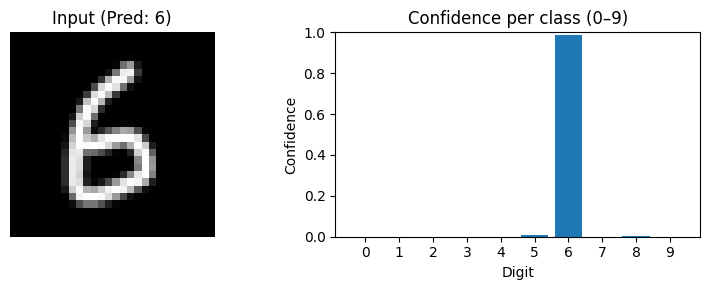

In [9]:
#@title Draw a digit (0–9) and classify with the trained MLP (with confidence chart)
from google.colab.output import eval_js
from IPython.display import display, Javascript
from base64 import b64decode
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt

model.eval()
try:
    model.load_state_dict(torch.load("best_mnist_val_fc.pt", map_location=device))
except Exception as e:
    print("Warning: could not load best_mnist_val_fc.pt. Train the model first.", e)

js = Javascript('''
async function draw_digit() {
  return await new Promise((resolve) => {
    const div = document.createElement('div');
    div.style.margin = '8px 0';
    const title = document.createElement('div');
    title.textContent = 'Draw a digit (white on black). Click Predict.';
    title.style.margin = '6px 0';
    const canvas = document.createElement('canvas');
    canvas.width = 280; canvas.height = 280;
    canvas.style.border = '1px solid #999';
    canvas.style.touchAction = 'none';
    const ctx = canvas.getContext('2d');
    ctx.fillStyle = 'black'; ctx.fillRect(0,0,canvas.width,canvas.height);
    let drawing=false;
    function rel(e){const r=canvas.getBoundingClientRect(); return {x:e.clientX-r.left, y:e.clientY-r.top};}
    canvas.addEventListener('mousedown', e=>{drawing=true; const p=rel(e); ctx.lineWidth=20; ctx.lineCap='round'; ctx.strokeStyle='white'; ctx.beginPath(); ctx.moveTo(p.x,p.y);});
    canvas.addEventListener('mousemove', e=>{if(!drawing)return; const p=rel(e); ctx.lineTo(p.x,p.y); ctx.stroke();});
    canvas.addEventListener('mouseup', ()=>{drawing=false;});
    canvas.addEventListener('mouseleave', ()=>{drawing=false;});
    canvas.addEventListener('touchstart', e=>{const r=canvas.getBoundingClientRect(); const t=e.touches[0]; drawing=true; ctx.lineWidth=20; ctx.lineCap='round'; ctx.strokeStyle='white'; ctx.beginPath(); ctx.moveTo(t.clientX-r.left,t.clientY-r.top); e.preventDefault();},{passive:false});
    canvas.addEventListener('touchmove', e=>{if(!drawing)return; const r=canvas.getBoundingClientRect(); const t=e.touches[0]; ctx.lineTo(t.clientX-r.left,t.clientY-r.top); ctx.stroke(); e.preventDefault();},{passive:false});
    canvas.addEventListener('touchend', ()=>{drawing=false;},{passive:false});
    const btns=document.createElement('div'); btns.style.marginTop='6px';
    const clearBtn=document.createElement('button'); clearBtn.textContent='Clear';
    const predictBtn=document.createElement('button'); predictBtn.textContent='Predict';
    clearBtn.style.marginRight='6px';
    clearBtn.onclick=()=>{ctx.fillStyle='black'; ctx.fillRect(0,0,canvas.width,canvas.height);};
    predictBtn.onclick=()=>{const dataURL=canvas.toDataURL('image/png'); resolve(dataURL); document.body.removeChild(div);};
    btns.appendChild(clearBtn); btns.appendChild(predictBtn);
    div.appendChild(title); div.appendChild(canvas); div.appendChild(btns);
    document.body.appendChild(div);
  });
}
''')
display(js)
dataURL = eval_js('draw_digit()')

if dataURL.startswith('data:image/png;base64,'):
    b64 = dataURL.split(',')[1]
else:
    b64 = dataURL

import io
img = Image.open(io.BytesIO(b64decode(b64))).convert('L')
img_small = img.resize((28,28), Image.BILINEAR)
arr = np.array(img_small).astype(np.float32)/255.0
x = torch.from_numpy(arr).unsqueeze(0).unsqueeze(0)
x = (x - 0.1307) / 0.3081
x = x.to(device)

with torch.no_grad():
    out = model(x)
    probs = torch.softmax(out, dim=1).cpu().numpy().squeeze(0)  # normalized 0–1
    pred = int(np.argmax(probs))

print(f"Predicted digit: {pred}")

fig, axs = plt.subplots(1, 2, figsize=(8, 3))
axs[0].imshow(arr, cmap='gray')
axs[0].set_title(f'Input (Pred: {pred})')
axs[0].axis('off')
axs[1].bar(range(10), probs)
axs[1].set_xticks(range(10))
axs[1].set_ylim([0, 1])
axs[1].set_xlabel("Digit")
axs[1].set_ylabel("Confidence")
axs[1].set_title("Confidence per class (0–9)")
plt.tight_layout()
plt.show()
